In [27]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.model_selection import train_test_split

# Label encoder

from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical

# Affichage des images

from PIL import Image

from matplotlib.image import imread

import cv2

# Traitement des images

import os
from os import listdir

In [28]:
# Recupération des données

data = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [29]:
# On récupère les première catégories dans la colonne product category tree

data['product_category_tree_preprocess'] = data['product_category_tree'].apply(lambda x : x[2:-2].split(' >> '))

# On associe les labels à la première catégorie du produit (celle la plus en haut dans l'arbre des catégories)

data['label_name'] = data['product_category_tree_preprocess'].apply(lambda x : x[0])

In [30]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category_tree_preprocess,label_name
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Home Furnishing, Curtains & Accessories, Curt...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[Baby Care, Baby Bath & Skin, Baby Bath Towels...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[Baby Care, Baby Bath & Skin, Baby Bath Towels...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[Home Furnishing, Bed Linen, Bedsheets, SANTOS...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[Home Furnishing, Bed Linen, Bedsheets, Jaipur...",Home Furnishing


# Préparation des images et des labels

In [31]:
len(data["label_name"].unique())

7

In [32]:
# On preprocess les labels

le = preprocessing.LabelEncoder()

data["label"] = le.fit_transform(data["label_name"])

In [33]:
# On crée un path vers les images

data['image_path'] = "Flipkart/Images/" + data['image']

In [34]:
data[["image_path","label_name","label"]]

,image_path,label_name,label
0,Flipkart/Images/55b85ea15a1536d46b7190ad6fff8c...,Home Furnishing,4
1,Flipkart/Images/7b72c92c2f6c40268628ec5f14c6d5...,Baby Care,0
2,Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad...,Baby Care,0
3,Flipkart/Images/d4684dcdc759dd9cdf41504698d737...,Home Furnishing,4
4,Flipkart/Images/6325b6870c54cd47be6ebfbffa620e...,Home Furnishing,4
...,...,...,...
1045,Flipkart/Images/958f54f4c46b53c8a0a9b8167d9140...,Baby Care,0
1046,Flipkart/Images/fd6cbcc22efb6b761bd564c2892848...,Baby Care,0
1047,Flipkart/Images/5912e037d12774bb73a2048f35a000...,Baby Care,0
1048,Flipkart/Images/c3edc504d1b4f0ba6224fa53a43a7a...,Baby Care,0


In [35]:
def load_image(filepath):
    # Une fonction pour récupérer toutes les images de la bonne couleur et de la même taille
    # filepath : Chemin vers les images dans le repértoire
    img = cv2.imread(filepath)#,cv2.COLOR_BGR2RGB)
    
    b,g,r = cv2.split(img)           # get b, g, r
    rgb_img = cv2.merge([r,g,b])     # switch it to r, g, b
    
    resized_image = cv2.resize(rgb_img, (140, 140)) 
    
    return resized_image

In [36]:
# On télécharge les images
data['image_rdy'] = data['image_path'].apply(lambda x : load_image(x))

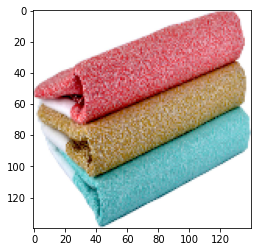

In [37]:
# On vérifie que l'image est bien téléchargé

plt.imshow(data['image_rdy'][1])

# Transfert learning avec VGG16

In [38]:
# loading the vgg16 model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump

In [39]:
# On utilise le modèle pré entrainé VGG16
model = VGG16()
# On rentire les dernières couche pour récupérer uniquement les features
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [40]:
# On vérifie l'input necessaire

model.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>]

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [42]:
from skimage import exposure

In [43]:
def feature_extracted(x,model=model):
    # On télécharge l'image et on extrait les feature avec le modele
    image = load_img(x, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # On augmente le contraste avec equalize_hist
    # b,g,r = cv2.split(image)
    # b = exposure.equalize_hist(b)
    # g = exposure.equalize_hist(g)
    # r = exposure.equalize_hist(r)
    # image = cv2.merge([b,g,r])
    # Les resultats étaient très mauvais avec l'equaliseur
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    return model.predict(image)

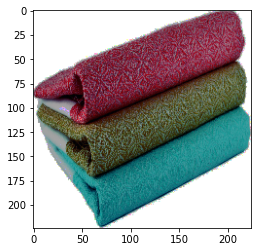

In [44]:
# On test le code de l'equalizeur pour bien visualiser

x=data['image_path'][1]
image = load_img(x, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
#img_eq = exposure.equalize_hist(image)
b,g,r = cv2.split(image)
b = exposure.equalize_hist(b)
g = exposure.equalize_hist(g)
r = exposure.equalize_hist(r)
image = cv2.merge([b,g,r])
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
#image = preprocess_input(image)
plt.imshow(image)

In [45]:
# On extrait les features de chaque image 

data['feature'] = data['image_path'].apply(lambda x : feature_extracted(x,model=model)[0])

1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 148ms/step


C:\Users\Louis\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 133ms/step


In [46]:
data['feature'][0].shape

(4096,)

In [47]:
# On reshape nos donnée pour le PCA

im_features = np.stack(data['feature'])

In [48]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


In [49]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(im_features)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(1050, 3)


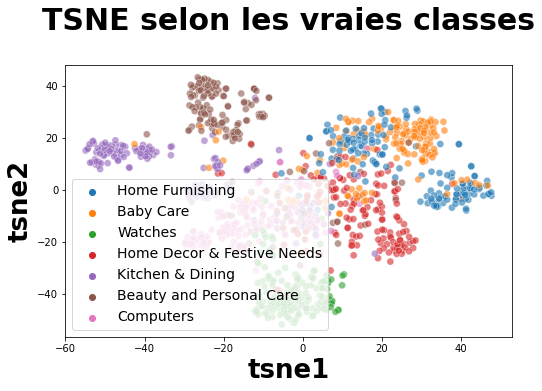

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [51]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


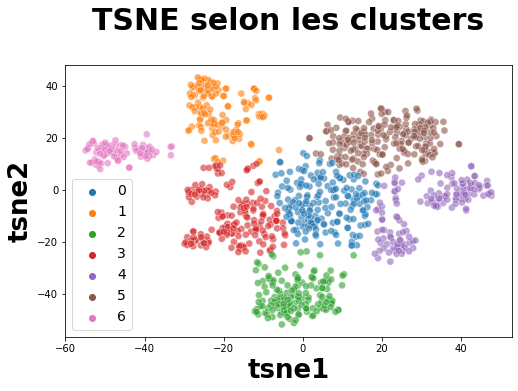

ARI :  0.4430906386810716


In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))